# **Supplementary Plots: $\Delta T=10$**
This notebook presents $\Delta T=10$sec version of plots in the original article "User Identification From Walking Activity" (https://nbviewer.jupyter.org/github/hshiokawa/walker_identifier/blob/master/walker_identifier.ipynb).<br><br>

Example time series data for participant 1, 6, and 8.

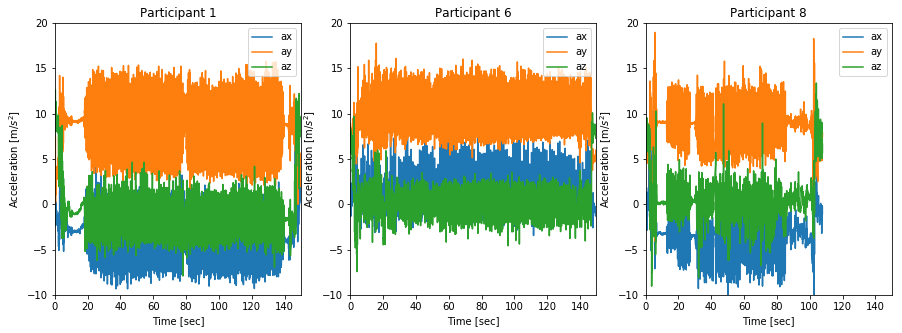

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

# read-in entire dataset
data = []
for i in range( 1, 23 ):
    data.append( pd.read_csv( 'data/%02d.csv'%i, names = [ 't', 'ax', 'ay', 'az' ]) )

# plotting class for repetitive usage
class plotting(object):
    def __init__( self, data ): self.data = data
    def plot_data( self, ID, f, alpha, title, legend=True ):
        f.plot( self.data[ID-1]['t'], self.data[ID-1]['ax'], alpha=alpha, label="ax") # -1 for 0 index
        f.plot( self.data[ID-1]['t'], self.data[ID-1]['ay'], alpha=alpha, label="ay")
        f.plot( self.data[ID-1]['t'], self.data[ID-1]['az'], alpha=alpha, label="az")
        f.set_xlim(0,150)
        f.set_ylim(-10,20)
        f.set_title( title )
        f.set_xlabel( 'Time [sec]' ); f.set_ylabel( r'Acceleration [m/$s^2$]' )
        if legend: f.legend( loc='upper right', fancybox=True )

# example plots for time vs. acceleration for 3 participants
p = plotting(data)
fig = plt.figure(figsize=(15,5))
f = fig.add_subplot(131); p.plot_data( 1, f, 1., 'Participant 1' )
f = fig.add_subplot(132); p.plot_data( 6, f, 1., 'Participant 6' )
f = fig.add_subplot(133); p.plot_data( 8, f, 1., 'Participant 8' )
plt.show()

### Mean and Standard Deviation
Time series of average value with standard deviation indicated by the error bars, for the above 3 participants with a segmentation size $\Delta T=10$ (sec).

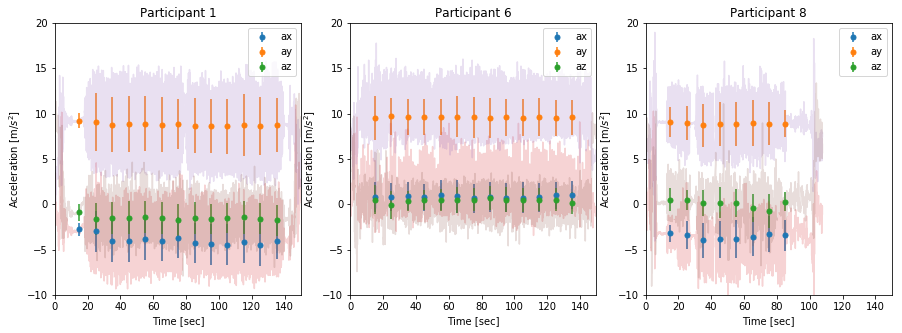

In [3]:
# parsing data into DT
class parse_data(object):
    def __init__( self, data, DT ):
        self.DT = DT
        self.data_parsed = []
        for d in data: self.data_parsed.append(self.parsing( d ))
        self.t_parsed_avg = []
        self.data_parsed_avg = []
        self.sig_parsed_avg = []
        for d in self.data_parsed:
            t_avg, d_avg, sig_avg = self.averaging( d )
            self.t_parsed_avg.append( t_avg )
            self.data_parsed_avg.append( d_avg )
            self.sig_parsed_avg.append( sig_avg )

    def parsing( self, data ):
        t_s = data['t'][0]
        t_e = t_s + self.DT
        i_s = 0
        data_parsed = []
        # need to loop since it's unevely sampled...
        for i, t in enumerate(data['t']):
            if t > t_e:
                data_parsed.append(data.iloc[i_s:i,:])
                i_s = i
                t_e = t + self.DT
        return data_parsed[1:-1]

    def averaging( self, data_parsed ):
        # calculate average and standard dev. for each segment
        t_avg = []; d_avg = []; sig = []
        for d in data_parsed:
            t_avg.append( np.average(d['t']) )
            cols = d.iloc[:,1:]
            d_avg.append( [np.average(cols[col]) for col in cols] )
            sig.append(   [np.std(    cols[col]) for col in cols] )
        d_avg = list(map( list, zip(*d_avg) ))
        sig   = list(map( list, zip(*sig  ) ))
        return t_avg,d_avg,sig

def plot_parse( par, ID, f ):
    t = par.t_parsed_avg[ID-1]; data = par.data_parsed_avg[ID-1]; sig = par.sig_parsed_avg[ID-1]
    f.errorbar( t, data[0], yerr=sig[0], fmt='.', ms=10, label='ax' )
    f.errorbar( t, data[1], yerr=sig[1], fmt='.', ms=10, label='ay' )
    f.errorbar( t, data[2], yerr=sig[2], fmt='.', ms=10, label='az' )
    plt.legend( loc='upper right' )
    

DT = 10. # segment size in second
par = parse_data( data, DT )

fig = plt.figure(figsize=(15,5))
f1 = fig.add_subplot(131); plot_parse( par, 1, f1 )
f2 = fig.add_subplot(132); plot_parse( par, 6, f2 )
f3 = fig.add_subplot(133); plot_parse( par, 8, f3 )

p = plotting( data )
p.plot_data( 1, f1, 0.2, 'Participant 1', legend=False )
p.plot_data( 6, f2, 0.2, 'Participant 6', legend=False )
p.plot_data( 8, f3, 0.2, 'Participant 8', legend=False )
plt.show()

Distribution of the 3 example participants in $\sigma_{ax}$, $\sigma_{ay}$, and $\sigma_{az}$ space for $\Delta T=10$ (left) and $5$ sec (right).

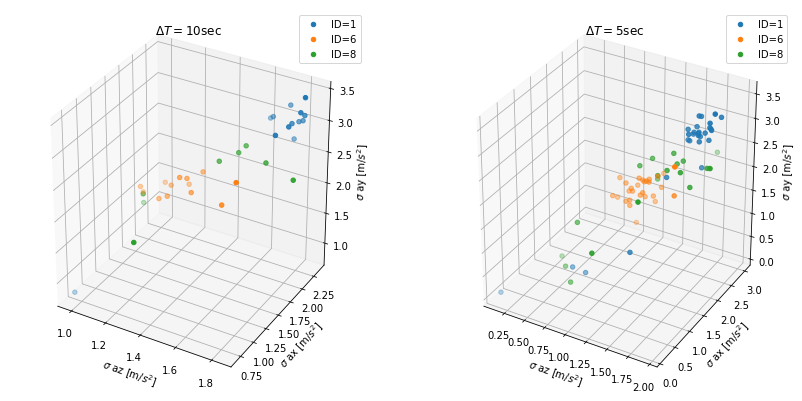

In [10]:
def plot_scatt(data,ID,f,title):
    f.scatter(data[ID[0]-1][2],data[ID[0]-1][0],data[ID[0]-1][1],label='ID=%d'%(ID[0]))
    f.scatter(data[ID[1]-1][2],data[ID[1]-1][0],data[ID[1]-1][1],label='ID=%d'%(ID[1]))
    f.scatter(data[ID[2]-1][2],data[ID[2]-1][0],data[ID[2]-1][1],label='ID=%d'%(ID[2]))
    f.set_xlabel(r'$\sigma$ az [m/$s^2$]')
    f.set_ylabel(r'$\sigma$ ax [m/$s^2$]')
    f.set_zlabel(r'$\sigma$ ay [m/$s^2$]')
    f.set_title(title)
    plt.legend()

fig = plt.figure(figsize=(14,7))
ID=[1,6,8]

par = parse_data( data, 10 ) # segment size = 5sec
plot_scatt( par.sig_parsed_avg, ID, fig.add_subplot(121,projection='3d'), r"$\Delta T=10$sec")
par = parse_data( data, 5 ) # segment size = 1sec
plot_scatt( par.sig_parsed_avg, ID, fig.add_subplot(122,projection='3d'), r"$\Delta T=5$sec")

$|a|(t)$ in 6th time segment ($\Delta T=10$sec) of participant 8 (left), its periodogram with the peak frequency marked by the vertical line (center), and time sequence of the peak frequency with the 10th time segment is marked by the red dot (right). Stronger and clearer peak than $\Delta T=5$sec appears in the central plot.

Text(0.5,1,'Time vs. Peak frequency')

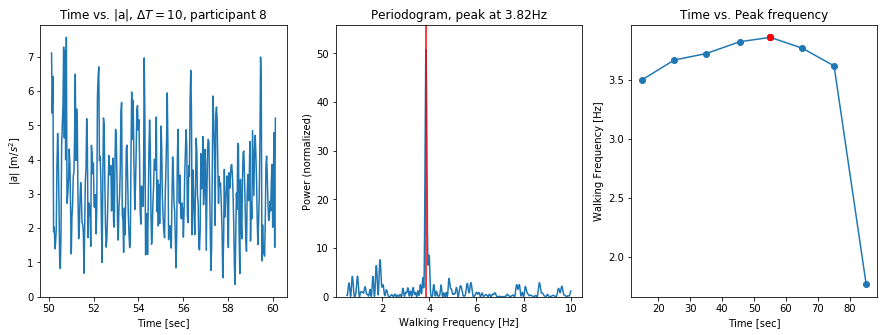

In [11]:
from gatspy.periodic import LombScargleMultibandFast
from gatspy.periodic import LombScargleFast

class Period(object):

    def get_a(self,par,ID):
        dp = par.data_parsed[ID-1]
        n_seg = len(dp)
        a=[]; t=[]
        for i_seg in range(n_seg):
            ax = dp[i_seg]['ax'] - np.average(dp[i_seg]['ax'])
            ay = dp[i_seg]['ay'] - np.average(dp[i_seg]['ay'])
            az = dp[i_seg]['az'] - np.average(dp[i_seg]['az'])
            amag = np.sqrt(ax**2+ay**2+az**2)
            a.append(amag)
            t.append(dp[i_seg]['t'])
        return(t,a)

    def get_LS(self, y ):
        N = len(y[0])
        #model = LombScargleMultibandFast(silence_warnings=True).fit(y[0], y[1])
        model = LombScargleFast(silence_warnings=True).fit(y[0], y[1])

        T = y[0][-1]-y[0][0]
        fmin = 1./T
        fmax = N/(2.*T)
        df = fmin/8.
        f = np.arange(fmin,fmax,df)
        periods = 1./f
        power = model.score(periods)

        power *= N/2 # make it equal to the normalized periodogram of NR eq. 13.8.4
        return [f, power]

    def get_fp(self,t,a,iseg):
        ti = np.array(t[iseg]); ai = np.array(a[iseg])
        f,p = self.get_LS([ti,ai])

        li = (f>1/2.)*(f<1/0.1) # period faster than 2sec, slower than 0.1sec
        ff=f[li]; fp=p[li]
        period = ff[np.argmax(fp)]
        return ti,ai,ff,fp,period

    def get_peaks(self,par,ID):
        t,a=self.get_a(par,ID)
        tseg=[]; aseg=[]; sseg=[]; pseg=[]
        for iseg in range(len(t)):
            ti,ai,ff,fp,period = self.get_fp(t,a,iseg)
            tseg.append(np.average(ti))
            aseg.append(np.average(ai))
            sseg.append(np.std(ai))
            pseg.append(period)
        return tseg,aseg,sseg,pseg

DT = 10. # segment size in second
par = parse_data( data, DT )
ID = 8
iseg = 4
per = Period()

fig = plt.figure(figsize=(15,5))
f1 = fig.add_subplot(131)
t,a = per.get_a(par,ID)
f1.plot(t[iseg],a[iseg])
f1.set_xlabel('Time [sec]')
f1.set_ylabel(r'$|a|$ [m/$s^2$]')
f1.set_title(r'Time vs. |a|, $\Delta T=10$, participant 8')

f2 = fig.add_subplot(132)
ti,ai,ff,fp,period = per.get_fp(t,a,iseg)
f2.plot(ff,fp)
f2.set_xlabel('Walking Frequency [Hz]')
f2.set_ylabel('Power (normalized)')
f2.set_title('Periodogram, peak at 3.82Hz')
ymax = np.max(fp)*1.1
f2.set_ylim(0,ymax)
f2.plot([period,period],[0,ymax],'r')

f3 = fig.add_subplot(133)
tseg,aseg,sseg,pseg=per.get_peaks(par,ID)
f3.plot(tseg,pseg,'o-')
f3.plot([tseg[iseg],tseg[iseg]],[pseg[iseg],pseg[iseg]],'ro')
f3.set_xlabel('Time [sec]')
f3.set_ylabel('Walking Frequency [Hz]')
f3.set_title('Time vs. Peak frequency')

Below is a scatter plot of the peak frequency and mean value of $|a|$ for the participant 1,6 and 8.

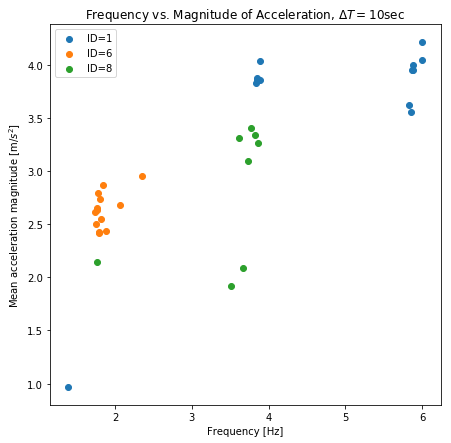

In [12]:
DT = 10. # segment size in second
par = parse_data( data, DT )
ID = [1,6,8]
per = Period()

fig = plt.figure(figsize=(7,7))
f = fig.add_subplot(111)
tseg,aseg,sseg,pseg=per.get_peaks(par,ID[0]); f.scatter(pseg,aseg,label='ID=%d'%ID[0])
tseg,aseg,sseg,pseg=per.get_peaks(par,ID[1]); f.scatter(pseg,aseg,label='ID=%d'%ID[1])
tseg,aseg,sseg,pseg=per.get_peaks(par,ID[2]); f.scatter(pseg,aseg,label='ID=%d'%ID[2])
f.set_xlabel('Frequency [Hz]')
f.set_ylabel(r'Mean acceleration magnitude [m/$s^2$]')
f.set_title(r'Frequency vs. Magnitude of Acceleration, $\Delta T=10$sec')
plt.legend()

Example visualization of decision boundaries for KNN, Decision tree, and SVM using only 2 features ($f$ and $\sigma_x$) and 5 participants (ID=1,3,5,7, and 8).

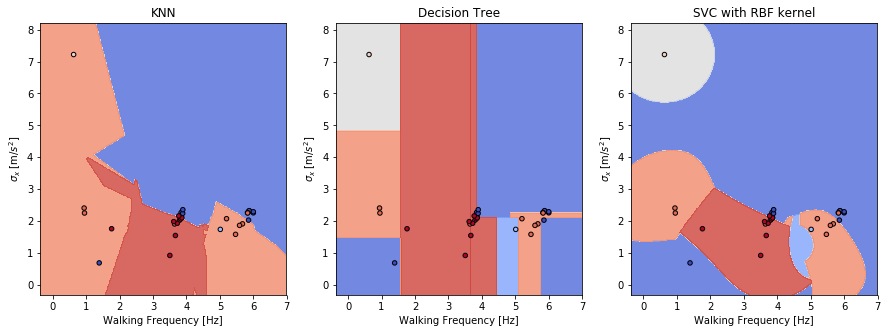

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

def get_features_and_labels(DT,ID):

    par = parse_data( data, DT )
    per = Period()
    pseg=[]; sigx=[]; sigy=[]; sigz=[]; labels=[]
    for i, i_d in enumerate(ID):
        #print(i_d)
        tseg,aseg,sseg,pseg_temp = per.get_peaks(par,i_d)
        pseg.append( pseg_temp )
        sigx.append( par.sig_parsed_avg[i_d-1][0] )
        sigy.append( par.sig_parsed_avg[i_d-1][1] )
        sigz.append( par.sig_parsed_avg[i_d-1][2] )
        labels.append( np.ones((len(tseg)),dtype=int)*i_d )

    pseg = [ i for pseg_n in pseg for i in pseg_n]
    sigx = [ i for sigx_n in sigx for i in sigx_n]
    sigy = [ i for sigy_n in sigy for i in sigy_n]
    sigz = [ i for sigz_n in sigz for i in sigz_n]

    features = np.transpose([pseg,sigx,sigy,sigz]) #63, 59, 57, n_neighbors=5
    labels = [ i for labels_n in labels for i in labels_n]
    return features,labels

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

DT = 10. # segment size in second
#ID = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,21]
ID = [1,3,5,7,8]
features,labels = get_features_and_labels(DT,ID)

# Take the first two features.
X = features[:, :2]
y = labels

models = (KNeighborsClassifier(n_neighbors=5),
          DecisionTreeClassifier(min_samples_split=2),
          SVC(C=10))
models = (clf.fit(X, y) for clf in models)

titles = ('KNN','Decision Tree','SVC with RBF kernel','Random Forest')

fig = plt.figure(figsize=(15,5))
sub = [fig.add_subplot(131),fig.add_subplot(132),fig.add_subplot(133)]

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max()); ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Walking Frequency [Hz]')
    ax.set_ylabel(r'$\sigma_{x}$ [m/$s^2$]')

    ax.set_title(title)

plt.show()
